## Titanic Project


#### Problem Statement:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
#Loading the Neceessary Liibraries

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the Dataset
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

### Data Preprocessing

#### Exploratory Data Analysis

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Confirming the Datatype of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Step - 1 Missing Values

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

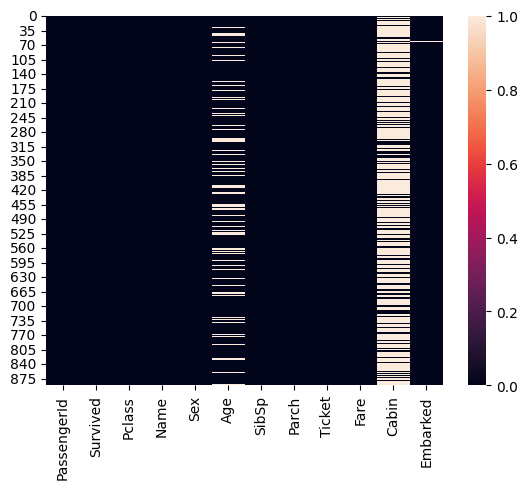

In [7]:
sns.heatmap(df.isnull())

- Observation - Age,Cabin and Embarked seem to have Null values in them
- Cabin column contains too many Nan Values so we have to drop the column
- PassengerID , Name, Cabin, Ticket columns need to be dropped

#### Step - 2 Numerical and Categorical Variables

In [8]:
Numerical_features = [i for i in df.columns if df[i].dtype != 'O']
Numerical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [9]:
df[Numerical_features].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Since PassengerId is not needed because it will keep increasing and Irrelevant to the Data we will drop the feature

<AxesSubplot: xlabel='Survived', ylabel='count'>

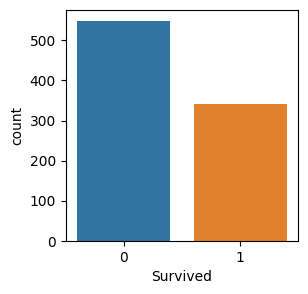

In [11]:
plt.figure(figsize=(3,3))
sns.countplot(df.Survived)

Observation - The above data shows that the survived people are lower than the people who could not survived

<AxesSubplot: xlabel='Survived', ylabel='count'>

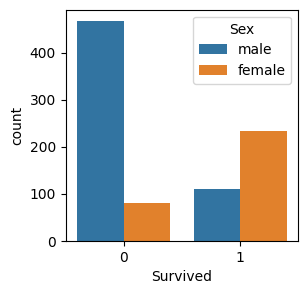

In [12]:
#Lets try to see survived based on other features
plt.figure(figsize=(3,3))
sns.countplot(x = 'Survived',hue='Sex',data = df)

Observation - The Female Passengers survived more than that of the male Passengers

<AxesSubplot: xlabel='Pclass', ylabel='count'>

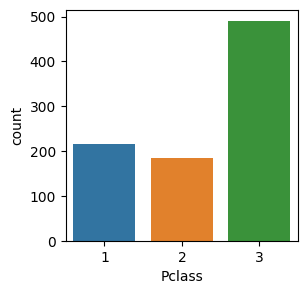

In [13]:
plt.figure(figsize=(3,3))
sns.countplot(df.Pclass)

<AxesSubplot: xlabel='Survived', ylabel='count'>

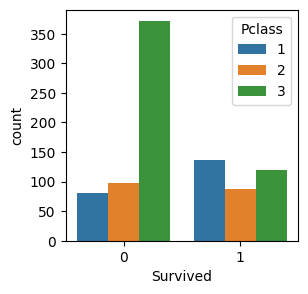

In [14]:
#Lets try with Survived based on Passenger Class
plt.figure(figsize=(3,3))
sns.countplot(x = 'Survived',hue=df.Pclass,data = df)

Observation - Passenger in Class 3 seem to have a high non survival than Other 2 classes

<AxesSubplot: xlabel='SibSp', ylabel='count'>

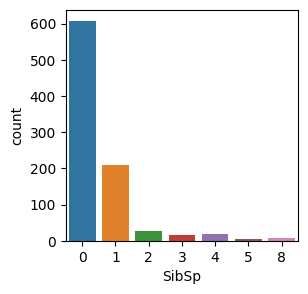

In [15]:
plt.figure(figsize=(3,3))
sns.countplot(df.SibSp)

Observation - The Passengers who travelled alone are far more than Passengers with families

<AxesSubplot: xlabel='Embarked', ylabel='count'>

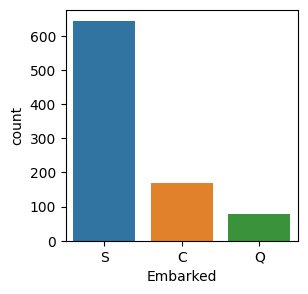

In [16]:
plt.figure(figsize=(3,3))
sns.countplot(df.Embarked)

Observation - The Highest Number of Passengers have Destination as Southhampton

<AxesSubplot: xlabel='Age', ylabel='Density'>

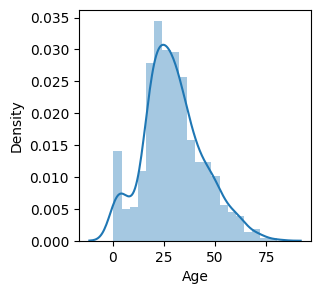

In [17]:
#Lets try to see the Distribution of Age
plt.figure(figsize=(3,3))
sns.distplot(df.Age)

Observation - The Data is almost Normally Distributed and Most Passengers Belonged to the Age group of 20-30

#### Dropping the Unecessary columns

In [18]:
df = df.drop(columns=['Name','Ticket','Cabin','PassengerId'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot: xlabel='SibSp', ylabel='Density'>

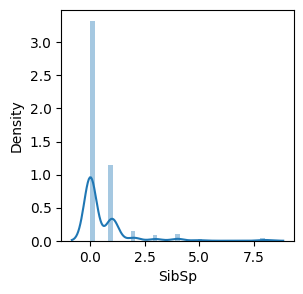

In [19]:
plt.figure(figsize=(3,3))
sns.distplot(df.SibSp)

<AxesSubplot: xlabel='Fare', ylabel='Density'>

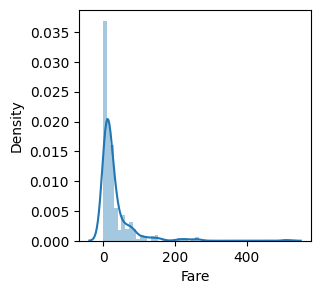

In [20]:
plt.figure(figsize=(3,3))
sns.distplot(df.Fare)

### Statistical Summary

In [21]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Handling the Missing Values and Categorical Values

In [22]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
#After Dropping Cabin columns we come to age column
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna('S',inplace=True)
#Since "S" is the most occured according to the above figure

In [24]:
#Encoding the Categorical Values
df = df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}})

In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [27]:
df.Age = df.Age.astype('int64')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [29]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,0
887,1,1,1,19,0,0,30.0000,0
888,0,3,1,29,1,2,23.4500,0
889,1,1,0,26,0,0,30.0000,1


#### Determing the Outliers

<AxesSubplot: xlabel='Pclass'>

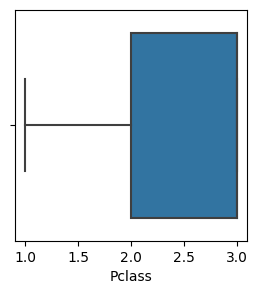

In [30]:
plt.figure(figsize=(3,3))
sns.boxplot(df['Pclass'])

<AxesSubplot: xlabel='Age'>

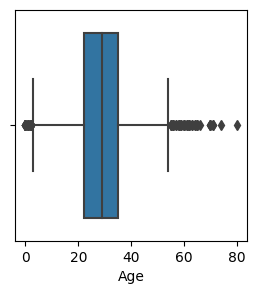

In [31]:
plt.figure(figsize=(3,3))
sns.boxplot(df.Age)

There are many Outliers present

<AxesSubplot: xlabel='SibSp'>

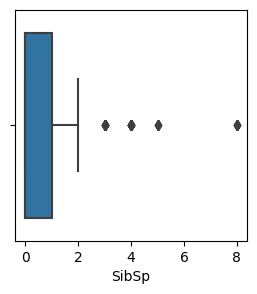

In [32]:
plt.figure(figsize=(3,3))
sns.boxplot(df.SibSp)

<AxesSubplot: xlabel='Fare'>

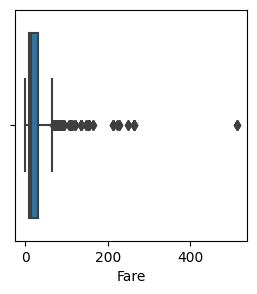

In [33]:
plt.figure(figsize=(3,3))
sns.boxplot(df.Fare)

There are many Outliers Present

In [34]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

#### Handling the Outliers

In [35]:
X = df.drop('Survived',axis = 1)
y = df.Survived

In [36]:
from scipy.stats import zscore
z = np.abs(zscore(X))
z.shape

(891, 7)

In [37]:
threshold = 3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 2, 2, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 2, 5, 3, 3, 5, 4,
       4, 2, 4, 2, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 2, 4, 5, 3, 3, 3, 3,
       3, 3, 2, 4, 3, 4], dtype=int64))


In [38]:
X = X[(z<3).all(axis=1)]
X.shape

(820, 7)

In [39]:
y = y[(z<3).all(axis=1)]
y.shape

(820,)

#### Checking Correlation

In [40]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.067809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.335071,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.082533,0.114631,0.245489,0.182333,0.116569
Age,-0.067809,-0.335071,-0.082533,1.000000,-0.232743,-0.176744,0.093856,0.000234
SibSp,-0.035322,0.083081,0.114631,-0.232743,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.176744,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.093856,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,0.000234,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot: >

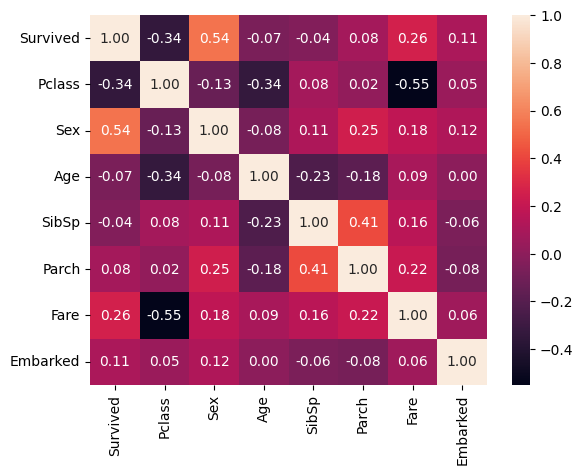

In [41]:
sns.heatmap(df.corr(),annot=True,fmt='.2f')

## Percentage Data Loss

In [42]:
loss_percent = (891-820)/891*100
loss_percent

7.968574635241302

##### The Data Loss is Around 8 percent

#### Transforming Data To Remove Skewness

In [43]:
from sklearn.preprocessing import power_transform
X = power_transform(X,method='yeo-johnson')

In [44]:
X

array([[ 0.87283049, -0.72203588, -0.60227338, ..., -0.48469263,
        -0.83470177, -0.61270775],
       [-1.47067587,  1.38497273,  0.69839737, ..., -0.48469263,
         1.55364494,  1.58624973],
       [ 0.87283049,  1.38497273, -0.26798782, ..., -0.48469263,
        -0.74331399, -0.61270775],
       ...,
       [ 0.87283049,  1.38497273, -0.0217228 , ...,  2.08665417,
         0.39490799, -0.61270775],
       [-1.47067587, -0.72203588, -0.26798782, ..., -0.48469263,
         0.65432009,  1.58624973],
       [ 0.87283049, -0.72203588,  0.22121133, ..., -0.48469263,
        -0.76629016,  1.72503675]])

In [45]:
y.value_counts()

0    500
1    320
Name: Survived, dtype: int64

#### Handling the Imbalanced Dataset

In [46]:
from imblearn.over_sampling import SMOTE
X,y = SMOTE().fit_resample(X,y)

### Train Test Split and Model Traning

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)

#### Feature Scaling

In [48]:
#Now we will proceed to feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Applying PCA

#### Model Training with Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,f1_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [50]:
print('accuracy :',accuracy_score(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

accuracy : 0.77
[[65 21]
 [25 89]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        86
           1       0.81      0.78      0.79       114

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



#### Model Training with SVC

In [51]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

In [52]:
print('accuracy :',accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

accuracy : 0.785
[[71 15]
 [28 86]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77        86
           1       0.85      0.75      0.80       114

    accuracy                           0.79       200
   macro avg       0.78      0.79      0.78       200
weighted avg       0.79      0.79      0.79       200



#### Model Training with Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)

In [54]:
print('accuracy :',accuracy_score(y_test,nb_pred))
print(confusion_matrix(y_test,nb_pred))
print(classification_report(y_test,nb_pred))

accuracy : 0.755
[[57 29]
 [20 94]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.70        86
           1       0.76      0.82      0.79       114

    accuracy                           0.76       200
   macro avg       0.75      0.74      0.75       200
weighted avg       0.75      0.76      0.75       200



#### Model Training with KNN classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [56]:
print('accuracy :',accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

accuracy : 0.805
[[68 18]
 [21 93]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        86
           1       0.84      0.82      0.83       114

    accuracy                           0.81       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.81      0.81       200



#### Model Training with DTC

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)

In [58]:
print('accuracy :',accuracy_score(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

accuracy : 0.775
[[69 17]
 [28 86]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        86
           1       0.83      0.75      0.79       114

    accuracy                           0.78       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200



#### Model Training with RandomForestCLassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [60]:
print('accuracy :',accuracy_score(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

accuracy : 0.8
[[67 19]
 [21 93]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        86
           1       0.83      0.82      0.82       114

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



In [61]:
print('The accuracy by Logistic Regressor is: ',accuracy_score(y_test,lr_pred))
print('The accuracy by SVC is :',accuracy_score(y_test,svc_pred))
print('The accuracy by Decision Tree Classifier is :',accuracy_score(y_test,dtc_pred))
print('The accuracy by Naive Bayes is :',accuracy_score(y_test,nb_pred))
print('The accuracy by KNN is :',accuracy_score(y_test,knn_pred))
print('The accuracy by RandomForest is :',accuracy_score(y_test,rf_pred))

The accuracy by Logistic Regressor is:  0.77
The accuracy by SVC is : 0.785
The accuracy by Decision Tree Classifier is : 0.775
The accuracy by Naive Bayes is : 0.755
The accuracy by KNN is : 0.805
The accuracy by RandomForest is : 0.8


#### AS CONCLUDED FROM ABOVE WE CAN SEE THAT THE ACCURACY BY KNN classifier is the Highest

##### Retraining to get the best accuracy by iterating the random state

In [62]:
for i in range(0,1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    knn.fit(X_train,y_train)
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state: ',i,' Model Performs very well')
        print('Accuracy is: ',accuracy_score(y_test,pred_test))

At random state:  174  Model Performs very well
Accuracy is:  0.855
At random state:  737  Model Performs very well
Accuracy is:  0.855
At random state:  918  Model Performs very well
Accuracy is:  0.855


we will train the Model using random state as 85

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=292)
jnn = KNeighborsClassifier(n_neighbors=7,n_jobs=-1)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [64]:
print('accuracy :',accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

accuracy : 0.84
[[86 16]
 [16 82]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       102
           1       0.84      0.84      0.84        98

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



##### Cross validating the Model using Kfold

In [65]:
from sklearn.model_selection import KFold
model = KNeighborsClassifier(n_jobs=-1)
kfold_validation = KFold(10)

In [66]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print('mean: ',np.mean(results))

[0.79 0.76 0.74 0.83 0.87 0.85 0.8  0.83 0.85 0.85]
mean:  0.817


### Saving the Model

In [68]:
import pickle
filename = 'TitanicSurvivalPrediction.pkl'
pickle.dump(knn,open(filename,'wb'))

In [69]:
a = np.array(y_test)
predicted = np.array(knn.predict(X_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))

In [70]:
df_com

,Original,Predicted
0,1,1
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
195,0,0
196,0,1
197,1,1
198,1,1
